## Warm up

In [426]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [427]:
xls = pd.ExcelFile("../data/pwt100.xlsx")
all_df = pd.read_excel(xls, "Data")

# 1. Trend Calculation

In [428]:
from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

In [429]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
data = all_df.loc[:, ("country", "year", "rgdpna", "pop")] #use 2017 national prices
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Brazil", ("year", "rgdpna", "rgdpna_pc")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)

Ypc = data["rgdpna_pc"]
ypc = np.log(Ypc)

Y = data["rgdpna"]
y = np.log(Y)

# Compute sample size.
T = len(Y) # sample size used for regression

Next, we will compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. We will use
`get_regression_coefs(y, x1, x2)` in Python to run our linear regressions.

### a) Linear Additive Model 📈

### GDP trend:

In [430]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [431]:
# Initialise predicted values Yhat
Yhat_add_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

/var/folders/kv/l9vcg1gs7xb1tfhh37wfc4_w0000gn/T/ipykernel_39967/3092062490.py:9: RuntimeWarning: invalid value encountered in log
  yhat_add_lin = np.log(Yhat_add_lin)


Now we proceed to plot the graph for the linear + additive model.

Text(0.5, 1.0, 'Additive Linear: GDP & trend')

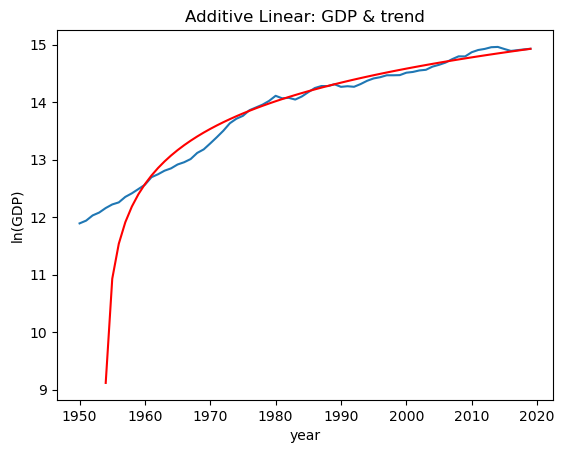

In [432]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_lin, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Linear: GDP & trend")


### GDP per capita trend:

Text(0.5, 1.0, 'Additive Linear: GDP per capita & trend')

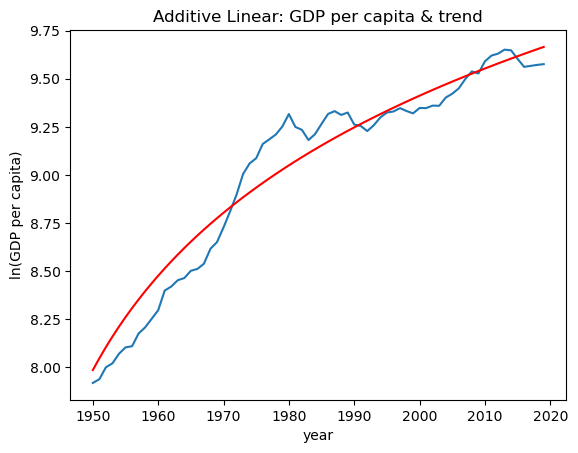

In [433]:
a_add_linpc, b_add_linpc = get_regression_coefs(Ypc, x1, x2)

# Initialise predicted values yhat
Yhat_add_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_linpc[t] = a_add_linpc + b_add_linpc * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_linpc = np.log(Yhat_add_linpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_linpc, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Linear: GDP per capita & trend")

### b) Linear Quadratic Model 📈

In [434]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [435]:
# Initialise predicted values Yhat
Yhat_add_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t+1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quad = np.log(Yhat_add_quad)

Now we proceed to plot the graph for the linear + quadratic model.

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP) & trend')

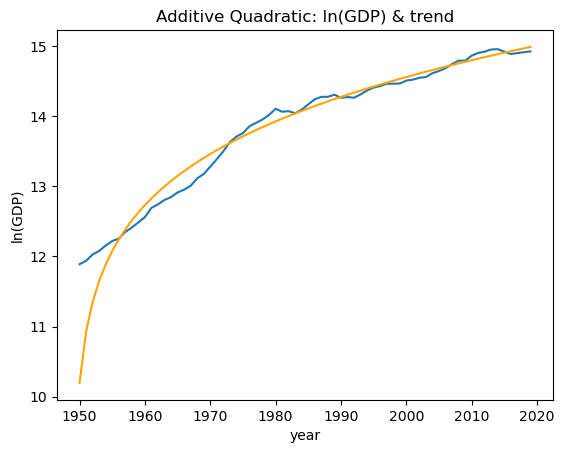

In [436]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_quad, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Quadratic: ln(GDP) & trend")

### GDP per capita trend:

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP per capita) & trend')

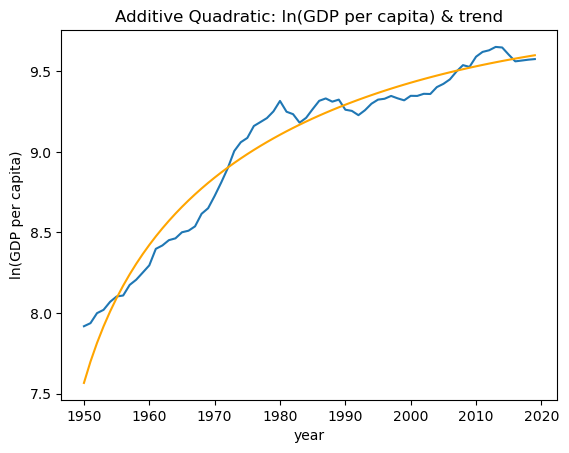

In [437]:
a_add_quadpc, b_add_quadpc, c_add_quadpc = get_regression_coefs(Ypc, x1, x2, x3)

# Initialise predicted values yhat
Yhat_add_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quadpc[t] = a_add_quadpc + b_add_quadpc * (t + 1) + c_add_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quadpc = np.log(Yhat_add_quadpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quadpc, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Quadratic: ln(GDP per capita) & trend")


### c) Exponential Linear Model 📈

In [438]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_exp_lin, b_exp_lin = get_regression_coefs(y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [439]:
# Initialise predicted values Yhat
yhat_exp_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + linear model.

Text(0.5, 1.0, 'Exponential Linear: GDP & trend')

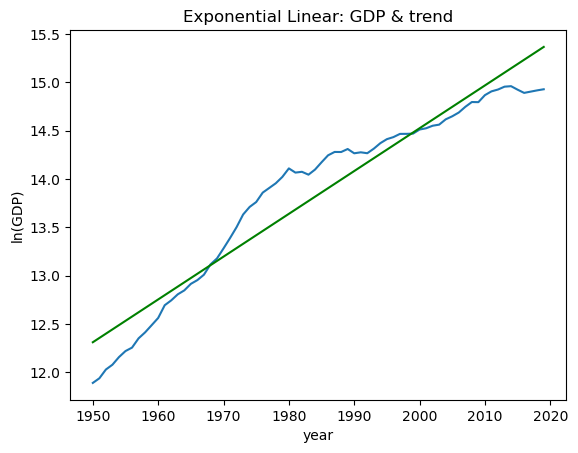

In [440]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_lin, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Linear: GDP & trend")


Text(0.5, 1.0, 'Exponential Linear: GDP per capita & trend')

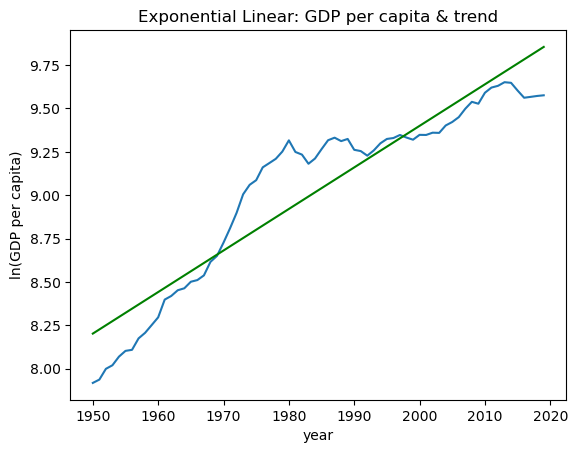

In [441]:
a_exp_linpc, b_exp_linpc = get_regression_coefs(ypc, x1, x2)

# Initialise predicted values yhat
yhat_exp_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_linpc[t] = a_exp_linpc + b_exp_linpc * (t + 1) # recall that Python indexing starts at 0

# No need to convert to log units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_linpc, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Linear: GDP per capita & trend")

### d) Exponential Quadratic Model 📈

In [442]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [443]:
# Initialise predicted values yhat
yhat_exp_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t+1)**2 # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + quadratic model.

Text(0.5, 1.0, 'Exponential Quadratic: GDP & trend')

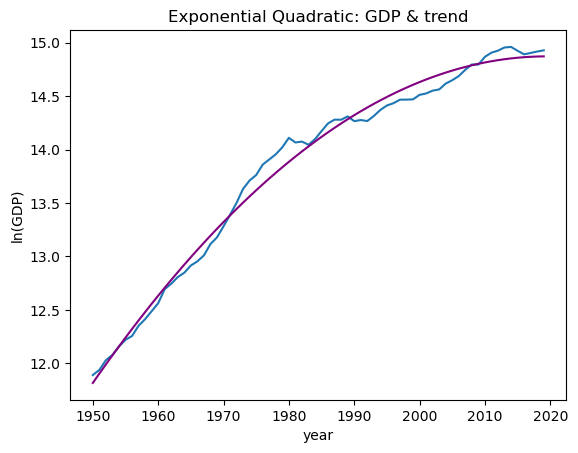

In [444]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_quad, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Quadratic: GDP & trend")


Text(0.5, 1.0, 'Exponential Quadratic: ln(GDP per capita) & trend')

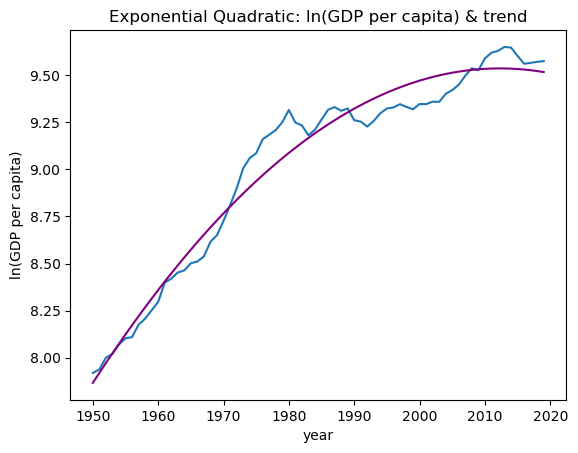

In [445]:
a_exp_quadpc, b_exp_quadpc, c_exp_quadpc = get_regression_coefs(ypc, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quadpc[t] = a_exp_quadpc + b_exp_quadpc * (t + 1) + c_exp_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# No need to convert into log-units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quadpc, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Quadratic: ln(GDP per capita) & trend")

# 2. Extracting TFP

# 3. Growth Accounting

# 4. Labour Productivity

In [446]:
#subset of brazil's year, real gdp, and population data
data_lp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna","emp")]
data_lp["lp"] = data_lp["rgdpna"] / data_lp["emp"]
# Reset the index (not crucial)
data_lp = data_lp.reset_index(drop = True)

Text(0.5, 1.0, 'Labour Productivity Series')

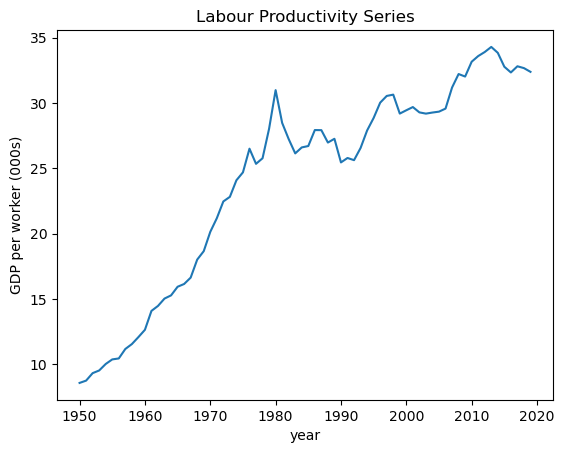

In [447]:
plt.figure()
plt.plot(data_lp['year'],data_lp['lp']/1000) #show gdp per worker in thousands

#labels
plt.xlabel("year")
plt.ylabel("GDP per worker (000s)")

#title
plt.title("Labour Productivity Series")